<hr id="import">

<h2>1. Data Collection</h2>

<h4>Importing libraries</h4> 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px
import time
from sklearn.manifold import TSNE
import seaborn as sns
RANDOM_SEED = 42
LABELS = ["Normal", "air blockage", "air leakage"]

<h4>Importing Dataset</h4>

In [2]:
# load the data
df = pd.read_csv('Pronto data_project 3.csv')
df.head()

,Hour of day,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,...,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV
0,3,99.791138,0.002018,16.464531,1.157051,0.000150,0.008799,18.75639,998.257629,1.131950,...,99.691002,0.0,100.001,0.002018,0.0,0.0,0.000150,0.0,0.0,0.008799
1,21,99.843597,0.001718,16.465521,1.157019,0.000151,0.008799,18.75639,998.257812,1.131800,...,99.745041,0.0,100.001,0.001718,0.0,0.0,0.000151,0.0,0.0,0.008799
2,11,99.848373,0.001418,16.466499,1.156986,0.000152,0.008799,18.51083,998.257996,1.131650,...,99.799088,0.0,100.001,0.001418,0.0,0.0,0.000152,0.0,0.0,0.008799
3,12,99.824516,0.001118,16.467489,1.156954,0.000153,0.008799,18.51083,998.258179,1.131646,...,99.853127,0.0,100.001,0.001118,0.0,0.0,0.000153,0.0,0.0,0.008799
4,20,99.772057,4.008060,16.468470,1.156922,0.000154,0.008800,18.51083,998.258301,1.131642,...,99.797951,0.0,100.001,4.008060,0.0,0.0,0.000154,0.0,0.0,0.008800


<hr id="clean">

<h2>2. Data Cleaning and Preparation</h2>

<h3 id="clean-missing">Handle missing values</h3>

<h4>Identify missing values</h4>

In [3]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13942 non-null  int64  
 1   FT305/OUT.CV           13908 non-null  float64
 2   FT302/OUT.CV           13879 non-null  float64
 3   FT305/AI2/OUT.CV       13874 non-null  float64
 4   PT312/OUT.CV           13940 non-null  float64
 5   FT102/OUT.CV           13925 non-null  float64
 6   FT104/OUT.CV           13938 non-null  float64
 7   FT102/AI3/OUT.CV       13837 non-null  float64
 8   FT102/AI2/OUT.CV       13887 non-null  float64
 9   PT417/OUT.CV           13813 non-null  float64
 10  PT408/OUT.CV           13850 non-null  float64
 11  PT403/OUT.CV           13908 non-null  float64
 12  FT404/OUT.CV           13901 non-null  float64
 13  FT406/OUT.CV           13912 non-null  float64
 14  PT501/OUT.CV           13895 non-null  float64
 15  PI

In [4]:
# find the number of missing values in each column
df.isna().sum()

Hour of day                0
FT305/OUT.CV              34
FT302/OUT.CV              63
FT305/AI2/OUT.CV          68
PT312/OUT.CV               2
FT102/OUT.CV              17
FT104/OUT.CV               4
FT102/AI3/OUT.CV         105
FT102/AI2/OUT.CV          55
PT417/OUT.CV             129
PT408/OUT.CV              92
PT403/OUT.CV              34
FT404/OUT.CV              41
FT406/OUT.CV              30
PT501/OUT.CV              47
PIC501/PID1/OUT.CV       134
LI502/OUT.CV              47
LI503/OUT.CV             139
LVC502-SR/PID1/OUT.CV    107
LI101/OUT.CV              90
FIC302/PID1/OUT.CV        35
FIC302/PID1/SP.CV        128
FIC302/PID1/PV.CV         61
FIC301/PID1/OUT.CV        37
FIC301/PID1/SP.CV         62
FIC301/PID1/PV.CV         83
FIC102/PID1/OUT.CV       133
FIC102/PID1/SP.CV         62
FIC102/PID1/PV.CV        129
FIC101/PID1/OUT.CV       112
FIC101/PID1/SP.CV         60
FIC101/PID1/PV.CV        102
dtype: int64

<h4>Drop rows with "NaN" from certain columns</h4>

In [5]:
# replace the missing values in the input columns with the mean of the previous and next values
df.interpolate(method='linear', inplace=True)


<h4 id="clean-duplicates">Remove duplicates</h4>

In [6]:
# find the number of duplicate rows
df.duplicated().sum()

4

In [7]:
# drop the duplicate rows
df.drop_duplicates(inplace=True)

<h4>Validate cleaned data</h4>

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13938 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13938 non-null  int64  
 1   FT305/OUT.CV           13938 non-null  float64
 2   FT302/OUT.CV           13938 non-null  float64
 3   FT305/AI2/OUT.CV       13938 non-null  float64
 4   PT312/OUT.CV           13938 non-null  float64
 5   FT102/OUT.CV           13938 non-null  float64
 6   FT104/OUT.CV           13938 non-null  float64
 7   FT102/AI3/OUT.CV       13938 non-null  float64
 8   FT102/AI2/OUT.CV       13938 non-null  float64
 9   PT417/OUT.CV           13938 non-null  float64
 10  PT408/OUT.CV           13938 non-null  float64
 11  PT403/OUT.CV           13938 non-null  float64
 12  FT404/OUT.CV           13938 non-null  float64
 13  FT406/OUT.CV           13938 non-null  float64
 14  PT501/OUT.CV           13938 non-null  float64
 15  PIC501/

In [9]:
# check for duplicates
df.duplicated().sum()

0

<h3>Principle Component Analysis (PCA)</h3>

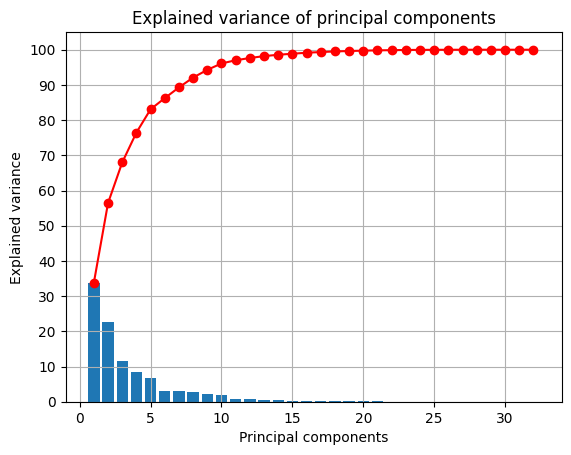

In [10]:
from sklearn.decomposition import PCA

# calculate principal components and plot explained variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pipe.fit(df)

# explained variance %
explained_variance = pipe.named_steps['pca'].explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

# plot the explained variance % as bar chart
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.title('Explained variance of principal components')
plt.show()

<h3>perform dimensionality reduction and visualize PCs</h3>

In [11]:

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Create a dataframe
X = pd.DataFrame(df)

# Transform the data
X_transformed = pipe.fit_transform(X)

# Create DataFrame with transformed data
df_PCA = pd.DataFrame(X_transformed, columns=['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

# Add a 'class' column
df_PCA['class'] = 0


In [12]:
df_PCA.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,-3.000332,2.548337,-0.722845,3.080975,-3.216727,0.817172,-0.859497,-0.408535,-0.530322,0.814645,0
1,-2.985982,2.552405,-0.712551,3.056955,-3.221367,-1.424255,0.669109,-0.171491,-0.575037,0.837087,0
2,-3.000576,2.552403,-0.744724,3.071525,-3.259703,-0.182504,-0.178579,-0.335553,-0.503883,0.822344,0
3,-2.995184,2.556296,-0.743652,3.051887,-3.271082,-0.306723,-0.093401,-0.322796,-0.509663,0.826285,0
4,-2.978169,2.520458,-0.723541,3.039033,-3.287033,-1.302933,0.586831,-0.220904,-0.523550,0.835907,0


<hr id="clean">
<h2>3.load faulty data, process</h2>

<h1>1</h1>

<h1>2</h1>

In [12]:
df_block = pd.read_csv('Class2..air blockage.csv')
df_leak  = pd.read_csv('Classs 1..air leakage.csv')

# drop class column 
df_block = df_block.drop(['class'], axis=1)
block_dataframe = pd.DataFrame(df_block)
df_leak = df_leak.drop(['class'], axis=1)
leak_dataframe = pd.DataFrame(df_leak)

# Define a new pipeline without the 'Hour of day' feature
new_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Drop the 'Hour of day' feature from the original DataFrame before fitting the new pipeline
df_no_hour_of_day = df.drop('Hour of day', axis=1)

# Fit the new pipeline on the modified DataFrame
new_pipe.fit(df_no_hour_of_day)

# Transform test data using the new pipeline
data_pca_block = new_pipe.transform(df_block)
data_pca_leak = new_pipe.transform(df_leak)

# Create DataFrame with transformed data
df_pca_block = pd.DataFrame(data_pca_block, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_block['class'] = 1

df_pca_leak = pd.DataFrame(data_pca_leak, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_leak['class'] = 2

# Combine the normal and faulty data into one dataframe
df_pca_combined = pd.concat([df_PCA, df_pca_block, df_pca_leak])
df_pca_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13948 entries, 0 to 4
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     13948 non-null  float64
 1   pc2     13948 non-null  float64
 2   pc3     13948 non-null  float64
 3   pc4     13948 non-null  float64
 4   pc5     13948 non-null  float64
 5   pc6     13948 non-null  float64
 6   pc7     13948 non-null  float64
 7   pc8     13948 non-null  float64
 8   pc9     13948 non-null  float64
 9   pc10    13948 non-null  float64
 10  class   13948 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 4 build and train a GMM for anomaly detection</h2>

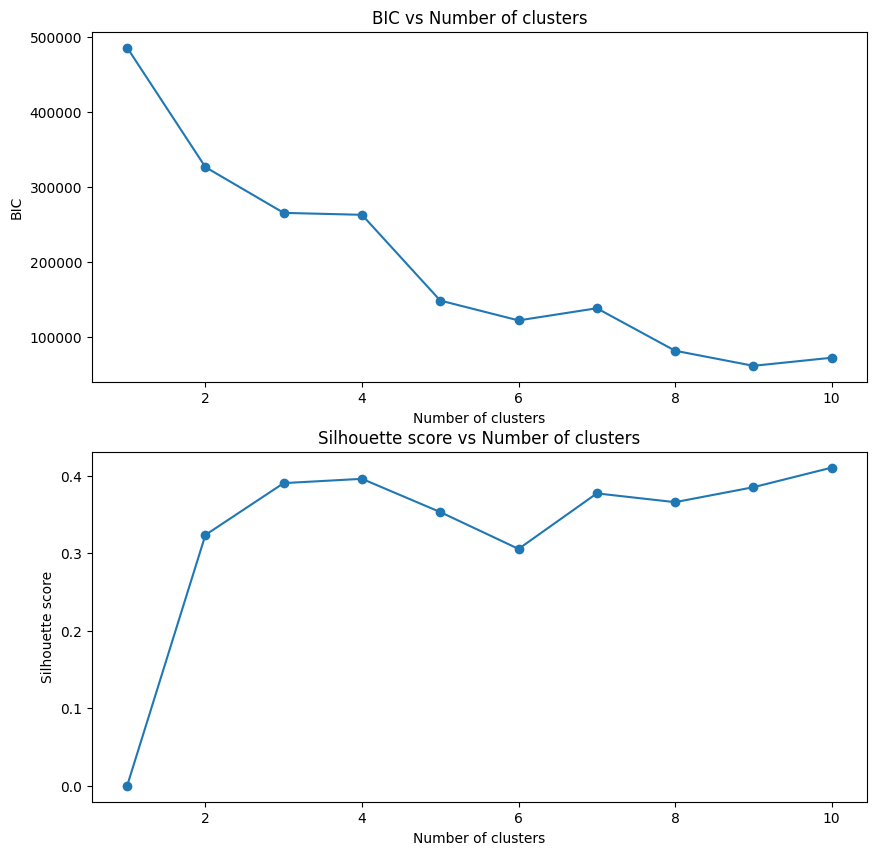

In [13]:
# TODO: determine the optimal number of clusters using the BIC elbow method for GMM
# train the model using only normal conditions data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

BICs = []
silhouettes = [0]
X = df_PCA.drop('class', axis=1)
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    BICs.append(gmm.bic(X))
    if i > 1:
        silhouettes.append(silhouette_score(X, gmm.predict(X)))

# plot the BICs
# subplot 1: BIC
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of clusters')

# subplot 2: silhouette score
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')

plt.show()


In [14]:
# TODO: build the GMM model with the optimum number of components
gmm = GaussianMixture(n_components=3, random_state=42)

# TODO: train the model using only the normal data
X = df_PCA.drop('class', axis=1)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 5. anomaly detection using the trained GMM</h2>


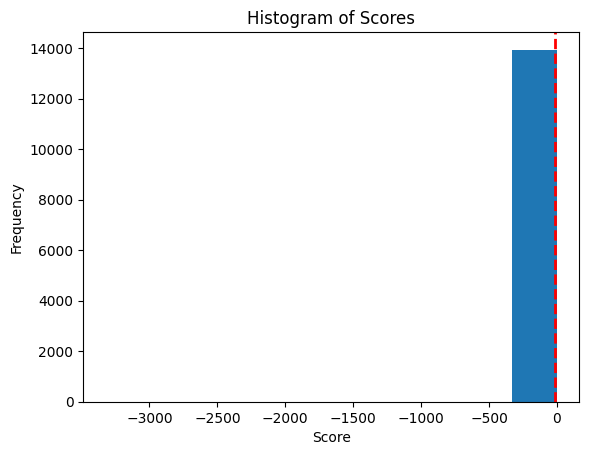

In [15]:
# TODO: 1. calculate the anomaly scores for the combined data
df_pca_combined['score'] = gmm.score_samples(df_pca_combined[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']])

# TODO: visualize the scores using a histogram
plt.hist(df_pca_combined['score'], bins=10)
plt.axvline(np.percentile(df_pca_combined['score'], 10), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

<h1>3</h1>

<h1>4</h1>

<h1>5</h1>

In [19]:
# TODO: 2. set threshold
threshold = np.percentile(df_pca_combined['score'], 15)

# TODO: 3. predict anomalies
df_pca_combined['anomaly'] = df_pca_combined['score'] < threshold

# TODO: visualize the data
fig = px.scatter_3d(df_pca_combined[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']], color='anomaly')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

# TODO: print classification report
from sklearn.metrics import classification_report
print(classification_report(df_pca_combined['class'], df_pca_combined['anomaly']))

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'] but received: anomaly

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 6 build and train a Isolate Forest  for anomaly detection</h2>

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest 
# 

<h4>Building and isolation forest model (10 features)</h4>

In [ ]:
anomaly_inputs=["pc1","pc2",'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']
model_IF=IsolationForest(contamination=0.1 , random_state=42 )
model_IF.fit(df_PCA[anomaly_inputs])
df_PCA['anomaly_score']=model_IF.decision_function(df_PCA[anomaly_inputs])
df_PCA['anomaly']=model_IF.predict(df_PCA[anomaly_inputs])
df_PCA.loc[:, ["pc1","pc2",'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10','anomaly_score','anomaly']]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,anomaly_score,anomaly
0,-3.000332,2.548337,-0.722845,3.080975,-3.216727,0.817173,-0.859497,-0.408535,-0.530321,0.814650,-0.010155,-1
1,-2.985982,2.552405,-0.712551,3.056955,-3.221367,-1.424255,0.669109,-0.171491,-0.575037,0.837093,-0.042744,-1
2,-3.000576,2.552403,-0.744724,3.071525,-3.259703,-0.182504,-0.178580,-0.335553,-0.503883,0.822350,0.020611,1
3,-2.995184,2.556296,-0.743652,3.051887,-3.271082,-0.306722,-0.093401,-0.322796,-0.509662,0.826291,0.017330,1
4,-2.978169,2.520458,-0.723541,3.039033,-3.287033,-1.302933,0.586830,-0.220904,-0.523549,0.835912,-0.016979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
13933,-2.198564,-5.170907,0.001754,0.451670,-2.029376,0.878529,-0.502771,-0.155747,1.553045,-0.830191,0.017791,1
13934,4.559566,0.377968,-1.697221,-1.138975,1.266495,0.864260,-0.502338,-0.699644,1.054270,-0.485229,0.048775,1
13935,1.397336,2.804180,1.036695,0.478909,-2.122948,-0.101082,-0.098846,1.308196,-0.522792,-0.007734,0.048101,1
13936,-2.856513,0.039578,-1.982162,0.503395,0.127628,0.745046,-0.460436,-0.103044,1.081472,-0.631383,0.081436,1


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

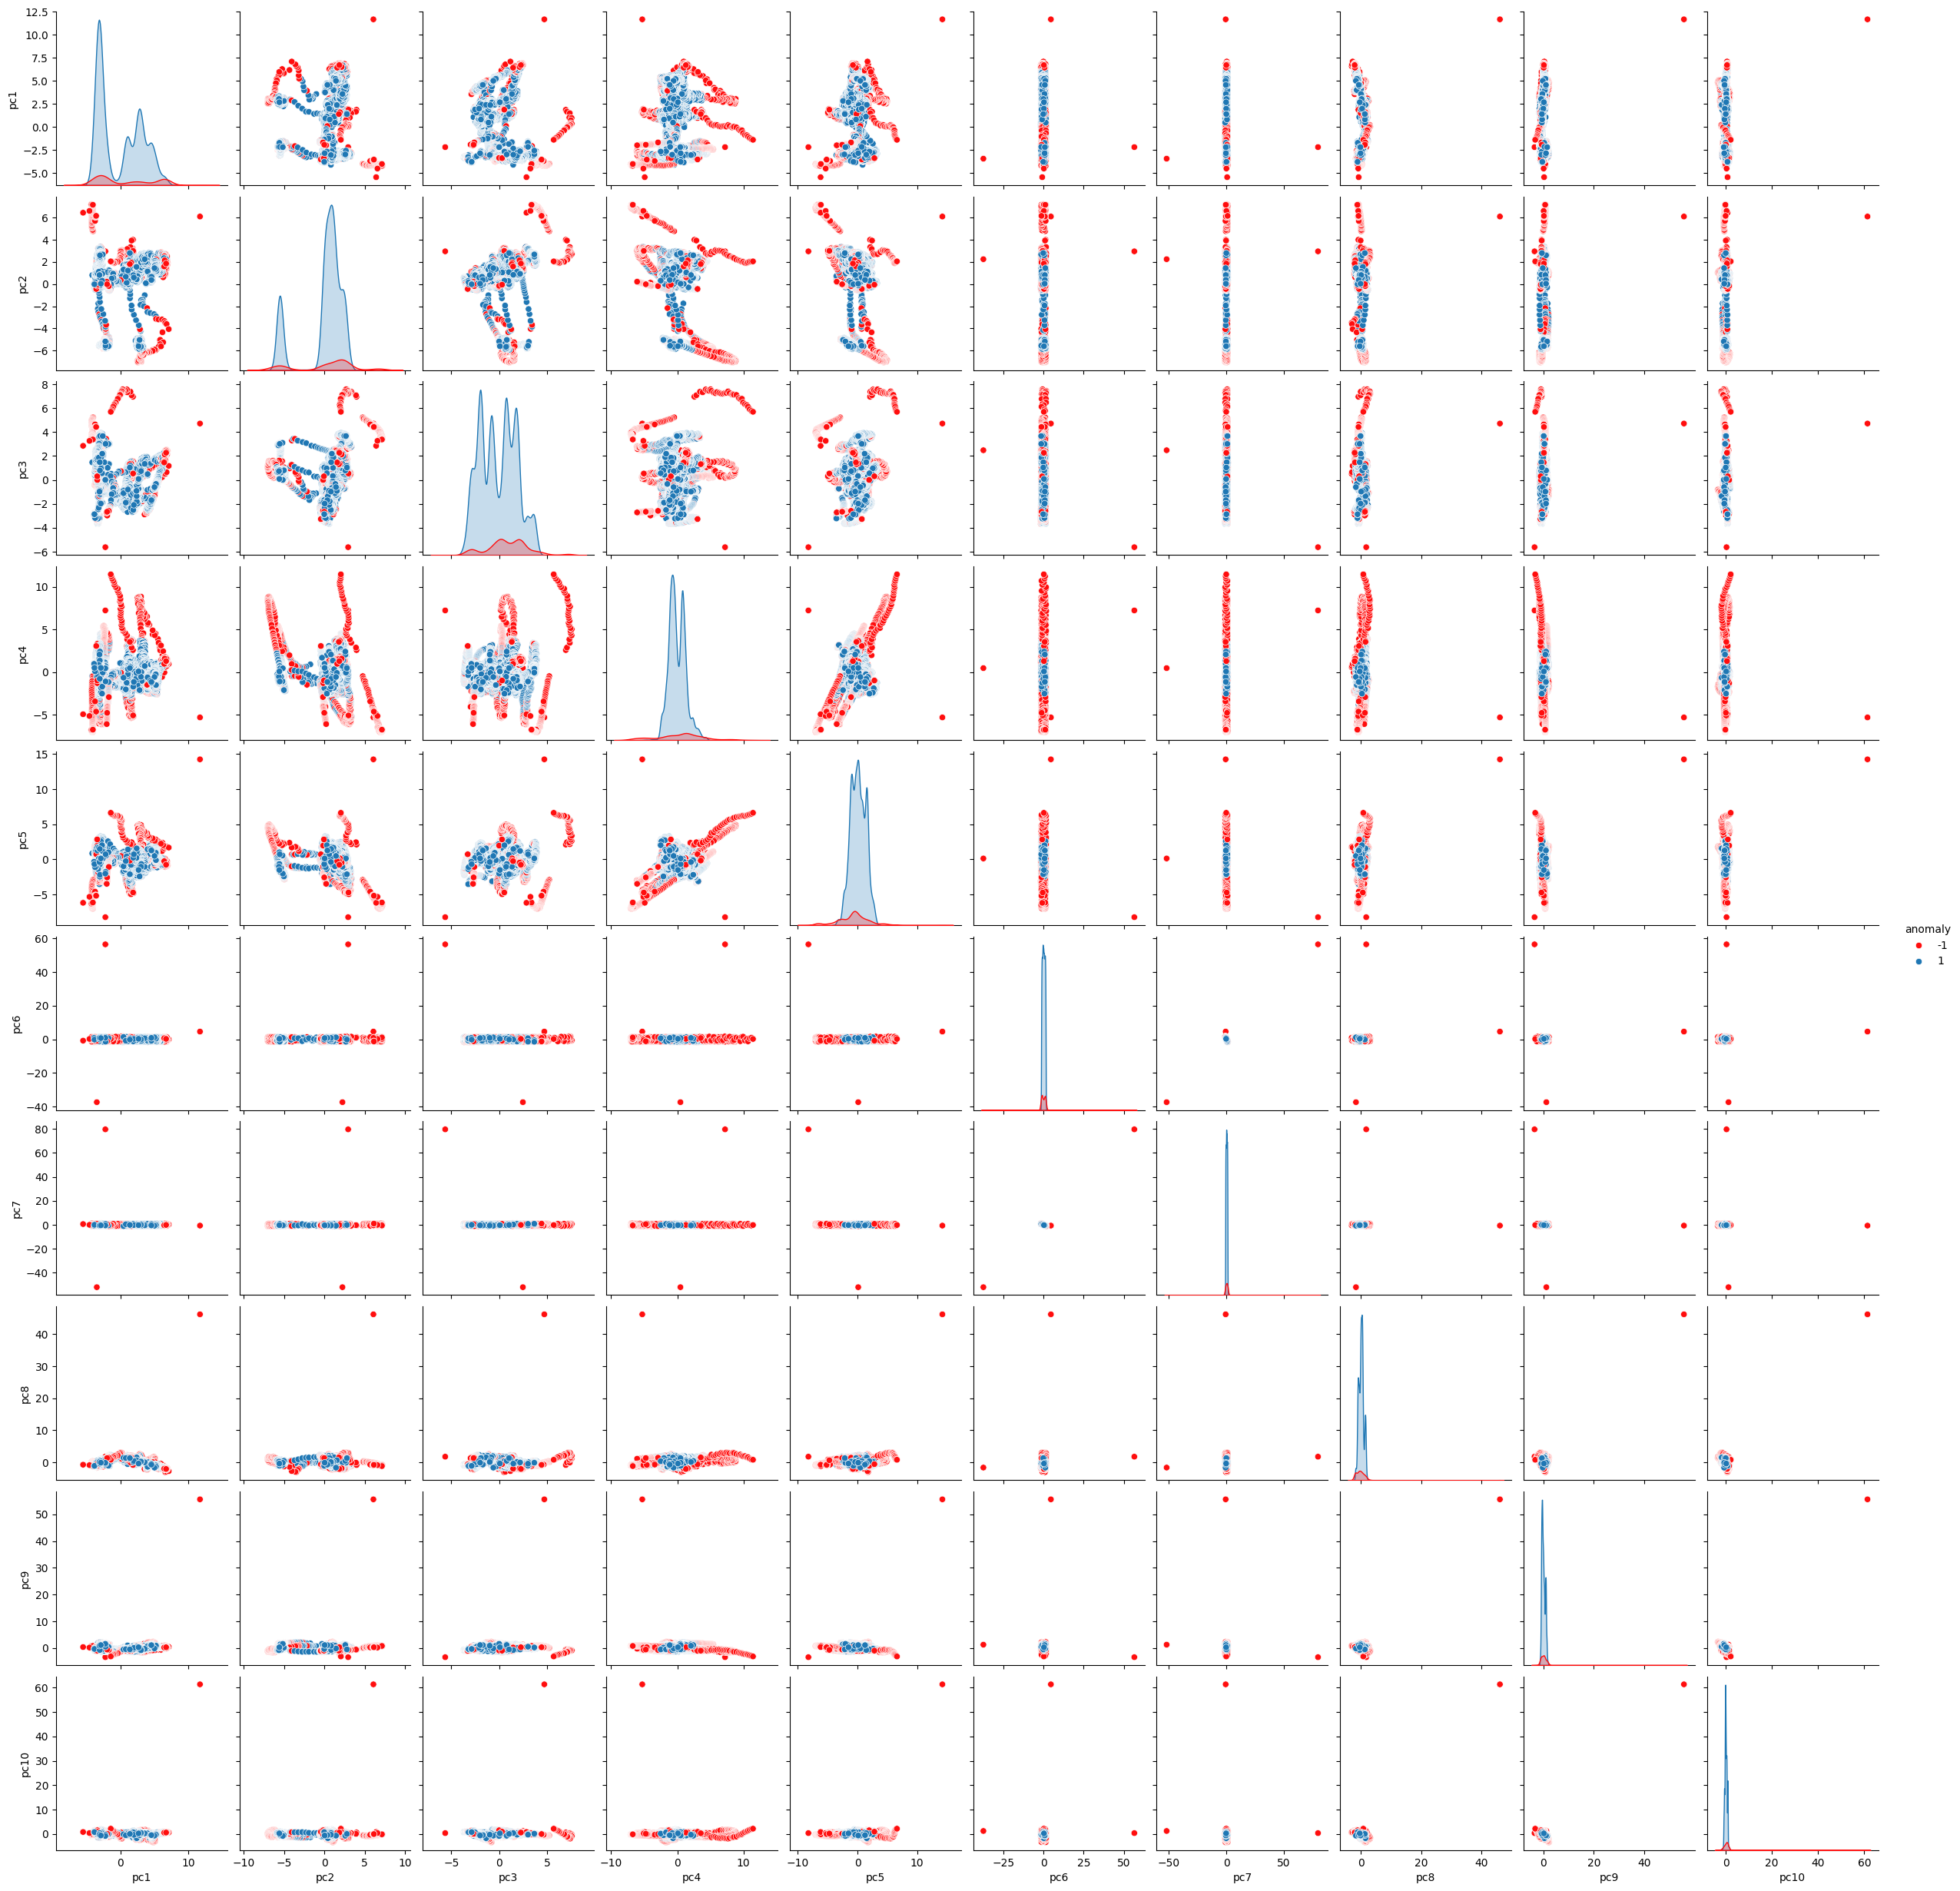

In [25]:
#plot the anomalies
palette=['#ff0e0e','#1f77b4','#03fc28']
sns.pairplot(df_PCA, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [23]:
# Your existing code
anomaly_inputs = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df_PCA[anomaly_inputs])
df_PCA['anomaly_score'] = model_IF.decision_function(df_PCA[anomaly_inputs])
df_PCA['anomaly'] = model_IF.predict(df_PCA[anomaly_inputs])

# New code to create three groups
# Define two thresholds for the anomaly scores
threshold_1 = np.percentile(df_PCA['anomaly_score'], 5)
threshold_2 = np.percentile(df_PCA['anomaly_score'], 10)

# Create a new column 'group' to assign each instance to a group
df_PCA['group'] = np.where(df_PCA['anomaly_score'] <= threshold_1, 'Group 1',
                           np.where(df_PCA['anomaly_score'] <= threshold_2, 'Group 2', 'Group 3'))

# Now you can view the dataframe with the new 'group' column
df_PCA.loc[:, anomaly_inputs + ['anomaly_score', 'anomaly', 'group']]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,anomaly_score,anomaly,group
0,-3.000332,2.548337,-0.722845,3.080975,-3.216727,0.817172,-0.859497,-0.408535,-0.530322,0.814645,-0.010155,-1,Group 2
1,-2.985982,2.552405,-0.712551,3.056955,-3.221367,-1.424255,0.669109,-0.171491,-0.575037,0.837087,-0.042744,-1,Group 1
2,-3.000576,2.552403,-0.744724,3.071525,-3.259703,-0.182504,-0.178579,-0.335553,-0.503883,0.822344,0.020611,1,Group 3
3,-2.995184,2.556296,-0.743652,3.051887,-3.271082,-0.306723,-0.093401,-0.322796,-0.509663,0.826285,0.017330,1,Group 3
4,-2.978169,2.520458,-0.723541,3.039033,-3.287033,-1.302933,0.586831,-0.220904,-0.523550,0.835907,-0.016979,-1,Group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,-2.198564,-5.170907,0.001754,0.451670,-2.029376,0.878529,-0.502771,-0.155747,1.553045,-0.830190,0.017791,1,Group 3
13934,4.559566,0.377968,-1.697221,-1.138975,1.266495,0.864260,-0.502338,-0.699644,1.054270,-0.485230,0.048775,1,Group 3
13935,1.397336,2.804180,1.036695,0.478909,-2.122948,-0.101082,-0.098846,1.308196,-0.522792,-0.007734,0.048101,1,Group 3
13936,-2.856513,0.039578,-1.982162,0.503395,0.127628,0.745046,-0.460436,-0.103044,1.081471,-0.631382,0.081436,1,Group 3


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

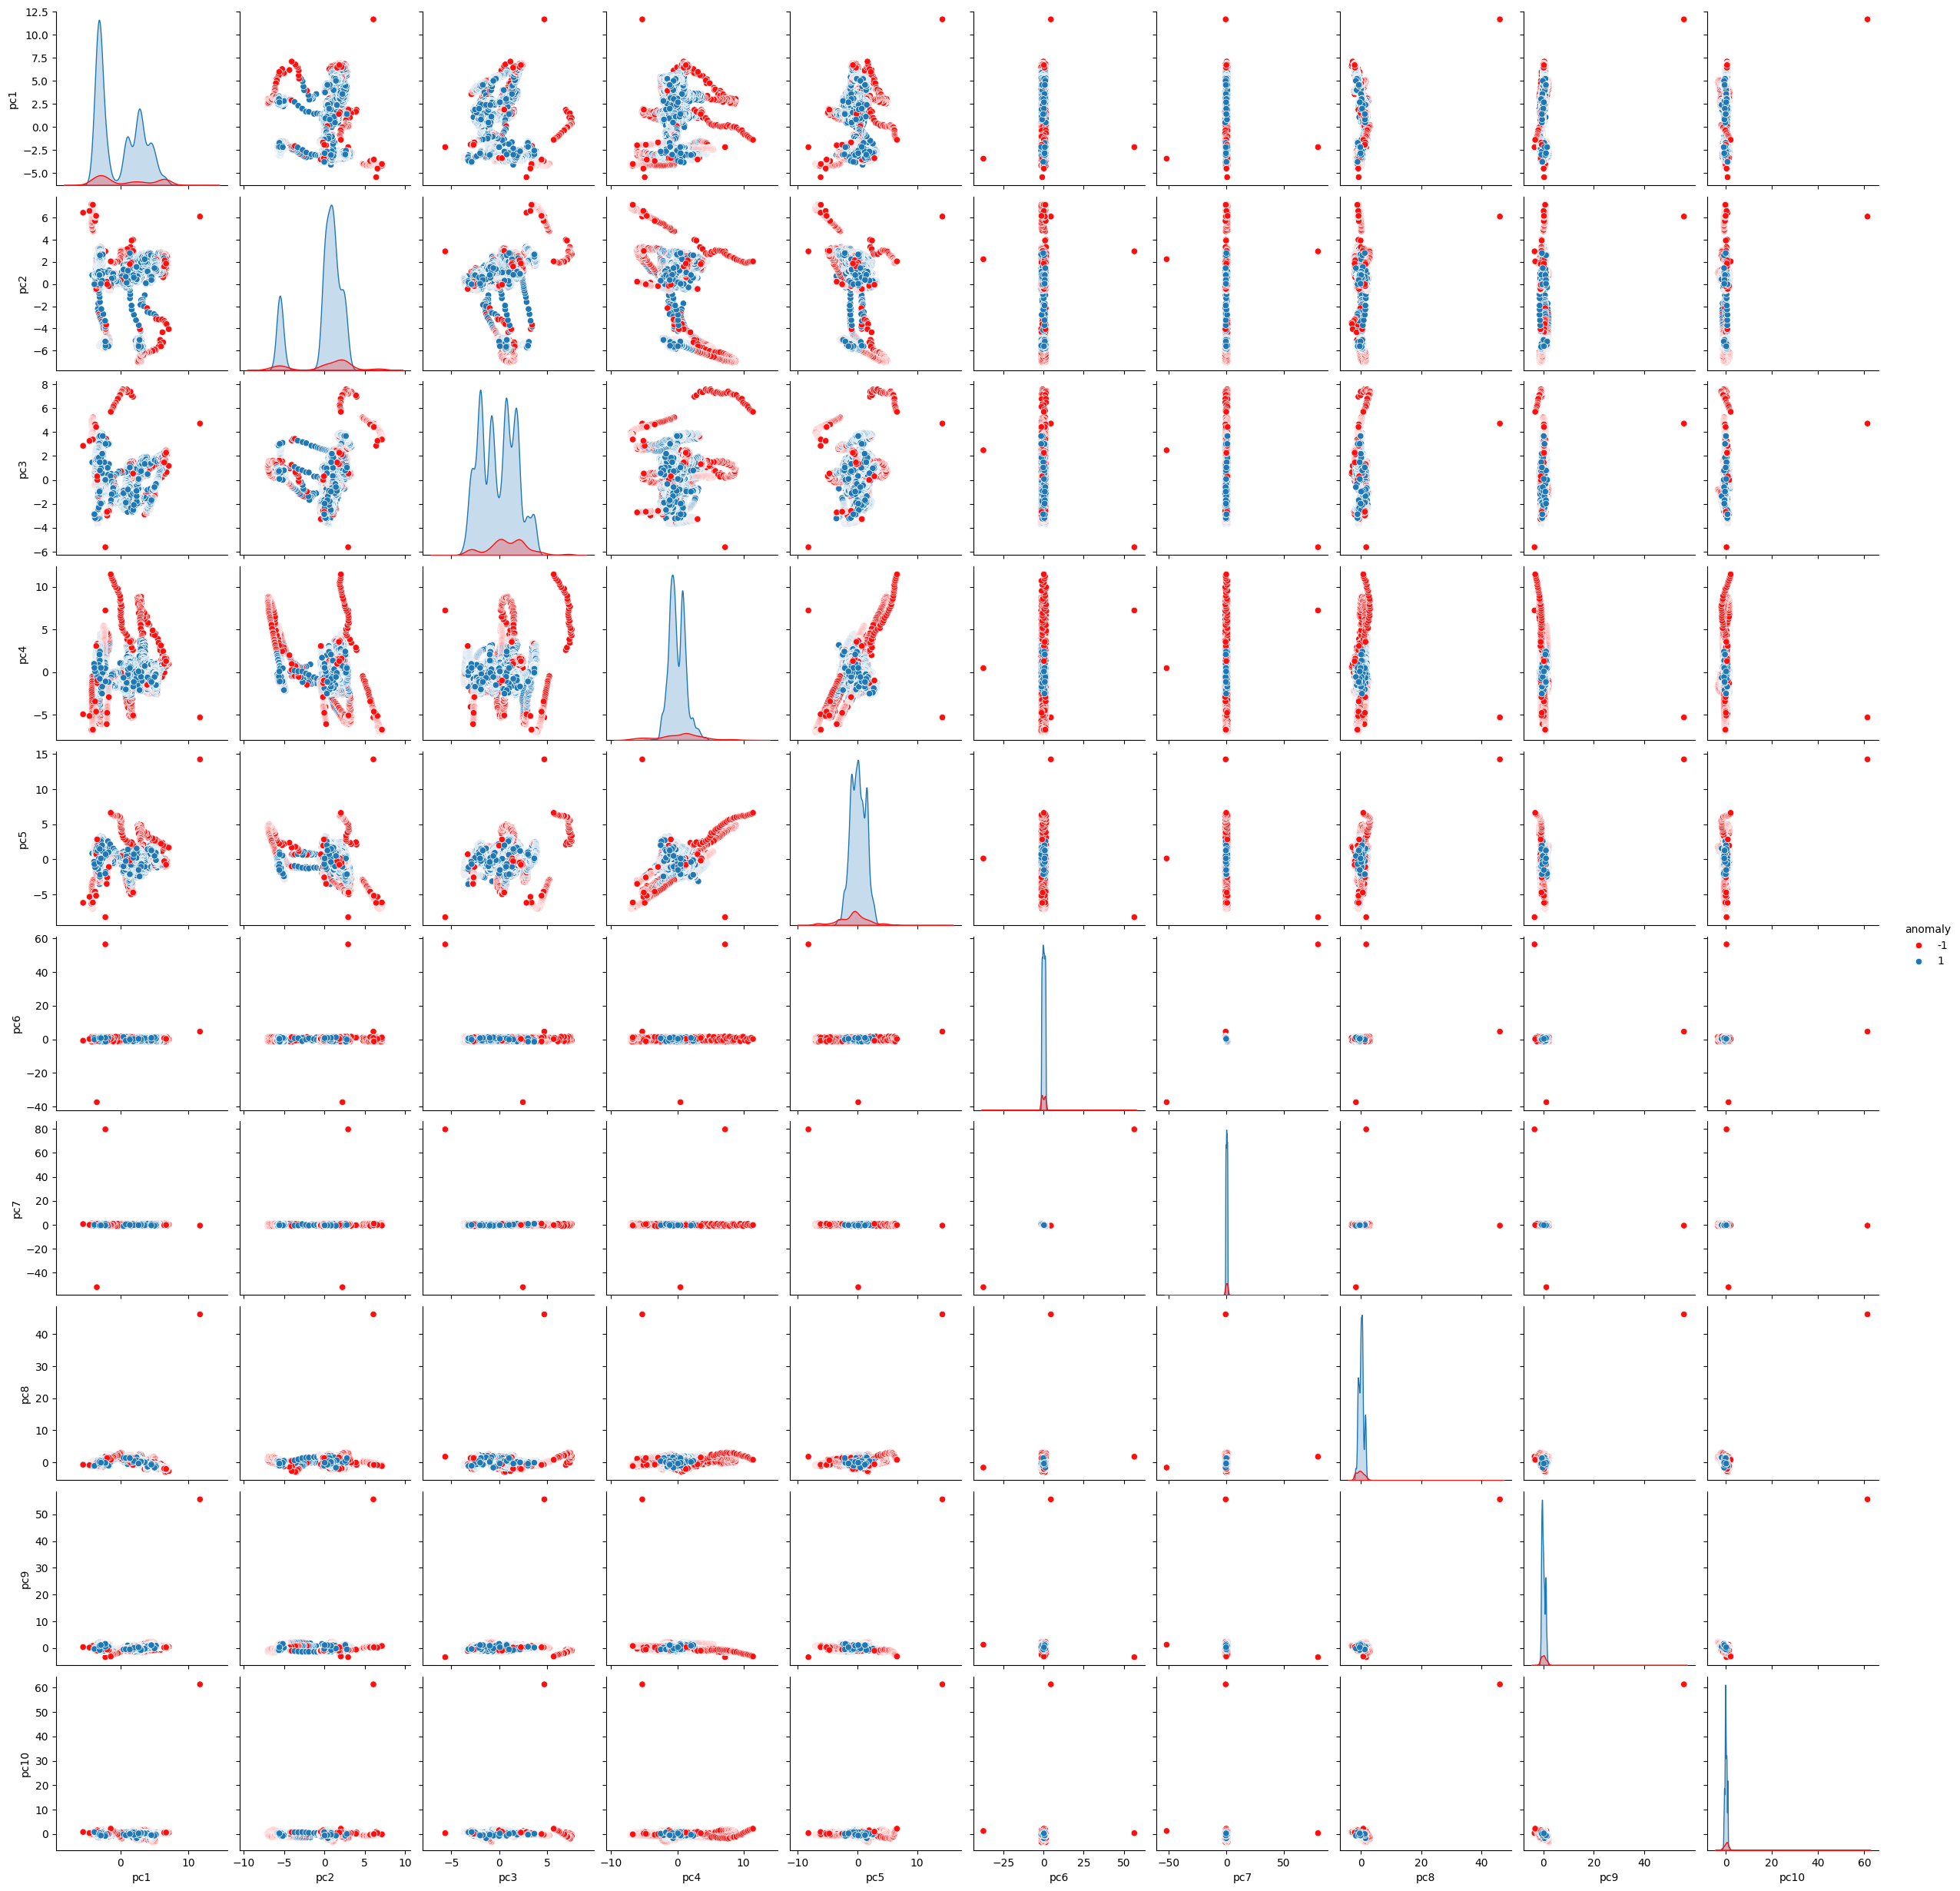

In [24]:
#plot the anomalies
palette=['#ff0e0e','#1f77b4','#03fc28']
sns.pairplot(df_PCA, vars=anomaly_inputs, hue='anomaly', palette=palette)

<h1>6</h1>

<h1>7</h1>

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


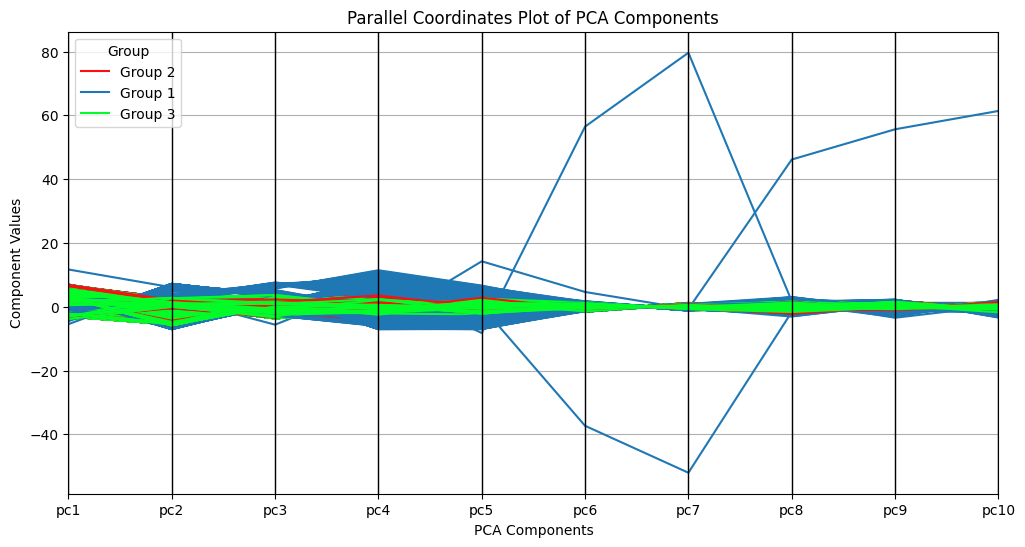

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming df_PCA is your DataFrame and 'group' is the column with group labels
plt.figure(figsize=(12, 6))
parallel_coordinates(df_PCA, 'group', cols=anomaly_inputs, color=['#ff0e0e','#1f77b4','#03fc28'])
plt.title('Parallel Coordinates Plot of PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.legend(title='Group')
plt.show()


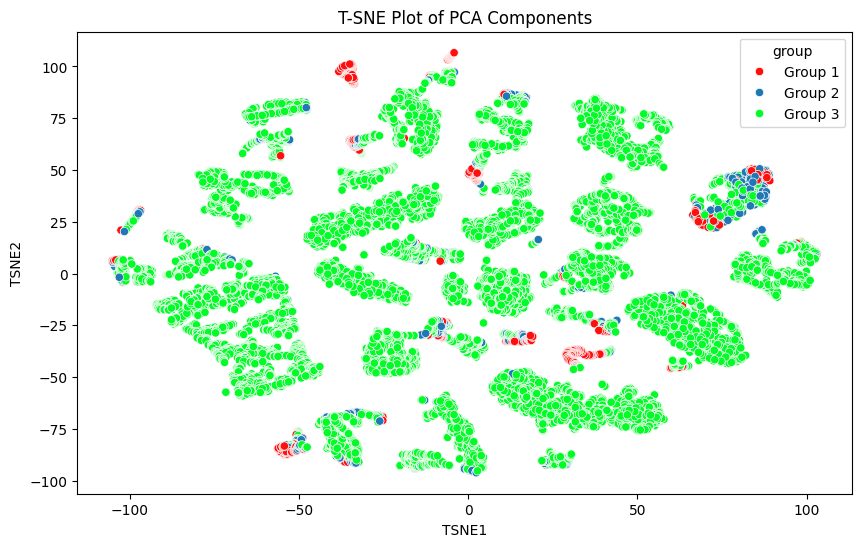

In [31]:
from sklearn.manifold import TSNE
import seaborn as sns

# Fit T-SNE to the PCA components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_PCA[anomaly_inputs])

# Create a DataFrame for the results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['group'] = df_PCA['group']

# Plot the results
palette=['#ff0e0e','#1f77b4','#03fc28']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='group', data=df_tsne, palette=palette)
plt.title('T-SNE Plot of PCA Components')
plt.show()


<h1>8</h1>

<h1>9</h1>

<h1>10</h1>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 7 build and train a Kmeans  for anomaly detection</h2>

In [34]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans_model.fit(df_PCA[anomaly_inputs])

# Assign the clusters to each data point
df_PCA['cluster'] = kmeans_model.labels_

# Display the data points with their assigned cluster
df_PCA.loc[:, ["pc1", "pc2", 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'cluster']]


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cluster
0,-3.000332,2.548337,-0.722845,3.080975,-3.216727,0.817172,-0.859497,-0.408535,-0.530322,0.814645,2
1,-2.985982,2.552405,-0.712551,3.056955,-3.221367,-1.424255,0.669109,-0.171491,-0.575037,0.837087,2
2,-3.000576,2.552403,-0.744724,3.071525,-3.259703,-0.182504,-0.178579,-0.335553,-0.503883,0.822344,2
3,-2.995184,2.556296,-0.743652,3.051887,-3.271082,-0.306723,-0.093401,-0.322796,-0.509663,0.826285,2
4,-2.978169,2.520458,-0.723541,3.039033,-3.287033,-1.302933,0.586831,-0.220904,-0.523550,0.835907,2
...,...,...,...,...,...,...,...,...,...,...,...
13933,-2.198564,-5.170907,0.001754,0.451670,-2.029376,0.878529,-0.502771,-0.155747,1.553045,-0.830190,1
13934,4.559566,0.377968,-1.697221,-1.138975,1.266495,0.864260,-0.502338,-0.699644,1.054270,-0.485230,0
13935,1.397336,2.804180,1.036695,0.478909,-2.122948,-0.101082,-0.098846,1.308196,-0.522792,-0.007734,0
13936,-2.856513,0.039578,-1.982162,0.503395,0.127628,0.745046,-0.460436,-0.103044,1.081471,-0.631382,2


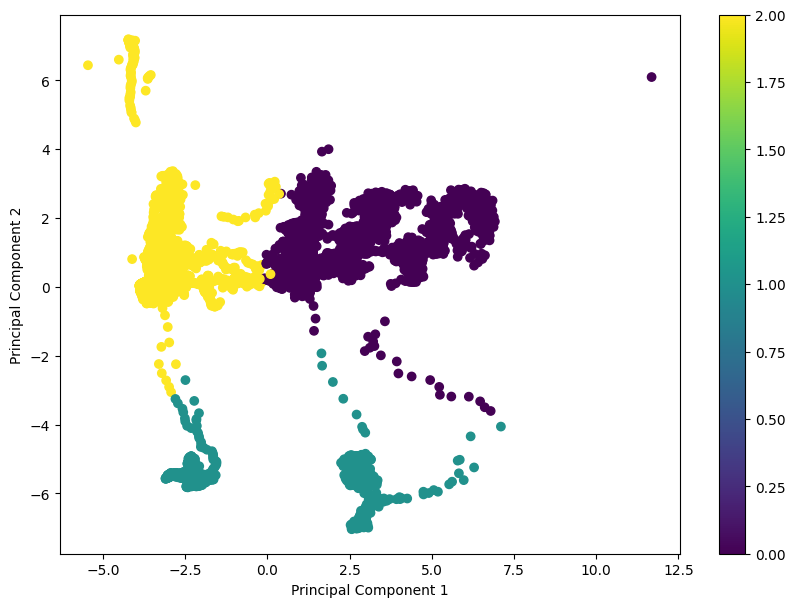

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_PCA[anomaly_inputs])

# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_PCA['cluster'], cmap='viridis', marker='o')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar to show the cluster colors
plt.colorbar()

# Show the plot
plt.show()


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 8 build and train a SVC  for anomaly detection</h2>